In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import skew, kurtosis, norm







df = pd.read_excel('06_MATRICULAS_ED_SUPERIOR_VALPARAISO_2021.xlsx')
df.head(10)

,ID,GENERO,EDAD,RANGO EDAD,AÑO INGRESO,SEMESTRE INGRESO,TIPO DE INSTITUCION,NOMBRE DE INSTITUCION,ACREDITACION INSTITUCIONAL,PERIODO DE ACREDITACION,...,NIVEL CARRERA,AREA CONOCIMIENTO,DURACION PLAN DE ESTUDIO (SEMESTRES),DURACION PROCESO TITULACION (SEMESTRES),DURACION TOTAL CARRERA (SEMESTRES),VALOR MATRICULA (PESOS),VALOR ARANCEL (PESOS),REGION SEDE,PROVINCIA SEDE,COMUNA SEDE
0,10,Femenino,24,20 a 24,2016,Primer semestre,Universidades Privadas,UNIVERSIDAD SANTO TOMAS,ACREDITADA,31/03/2021 AL 31/03/2025,...,Carreras Profesionales,Salud,10,0,10,130000,3713000,Valparaiso,Valparaiso,Vina Del Mar
1,25,Femenino,19,15 a 19,2021,Primer semestre,Institutos Profesionales,IP INSTITUTO DE ESTUDIOS BANCARIOS GUILLERMO S...,ACREDITADA,17/12/2017 AL 17/12/2022,...,Carreras Profesionales,Administracion y Comercio,8,0,8,190000,1900000,Valparaiso,Valparaiso,Vina Del Mar
2,28,Masculino,24,20 a 24,2019,Primer semestre,Institutos Profesionales,IP AIEP,ACREDITADA,22/10/2017 AL 22/10/2022,...,Carreras Profesionales,Administracion y Comercio,8,1,8,190000,1760000,Valparaiso,San Felipe De Aconcagua,San Felipe
3,29,Masculino,24,20 a 24,2015,Primer semestre,Universidades CRUCH,PONTIFICIA UNIVERSIDAD CATOLICA DE VALPARAISO,ACREDITADA,26/11/2015 AL 26/11/2021,...,Carreras Profesionales,Educacion,9,0,9,208000,2558000,Valparaiso,Valparaiso,Valparaiso
4,42,Masculino,26,25 a 29,2014,Primer semestre,Universidades CRUCH,UNIVERSIDAD TECNICA FEDERICO SANTA MARIA,ACREDITADA,29/12/2016 AL 29/12/2022,...,Carreras Profesionales,Arte y Arquitectura,10,1,11,186000,4350000,Valparaiso,Valparaiso,Valparaiso
5,54,Masculino,21,20 a 24,2021,Primer semestre,Universidades Privadas,UNIVERSIDAD ANDRES BELLO,ACREDITADA,24/12/2017 AL 24/12/2022,...,Carreras Profesionales,Salud,14,0,14,590000,7290000,Valparaiso,Valparaiso,Vina Del Mar
6,55,Masculino,21,20 a 24,2019,Primer semestre,Universidades Privadas,UNIVERSIDAD TECNOLOGICA DE CHILE INACAP,ACREDITADA,27/11/2018 AL 27/11/2021,...,Carreras Profesionales,Tecnologia,8,0,8,250000,2122000,Valparaiso,Valparaiso,Valparaiso
7,57,Femenino,26,25 a 29,2018,Primer semestre,Institutos Profesionales,IP INSTITUTO INTERNACIONAL DE ARTES CULINARIAS...,ACREDITADA,09/03/2021 AL 09/03/2025,...,Carreras Profesionales,Administracion y Comercio,8,1,8,498728,3485364,Valparaiso,Valparaiso,Vina Del Mar
8,66,Masculino,25,25 a 29,2021,Primer semestre,Institutos Profesionales,IP DUOC UC,ACREDITADA,26/08/2017 AL 26/08/2024,...,Carreras Tecnicas,Tecnologia,5,1,5,176000,1920000,Valparaiso,Valparaiso,Valparaiso
9,79,Masculino,19,15 a 19,2021,Primer semestre,Universidades CRUCH,UNIVERSIDAD DE VALPARAISO,ACREDITADA,25/10/2017 AL 25/10/2022,...,Carreras Profesionales,Arte y Arquitectura,12,2,12,176000,4019000,Valparaiso,Valparaiso,Valparaiso


1.Estudien la correlación entre el valor de la matrícula y el valor del arancel para toda la base de datos y luego separen por tipo de institución. ¿Los grupos se         comportan parecido? ¿Vale la pena estudiar todos los grupos? Visualicen apropiadamente.

Correlacion total entre matricula y arancel: 0.57


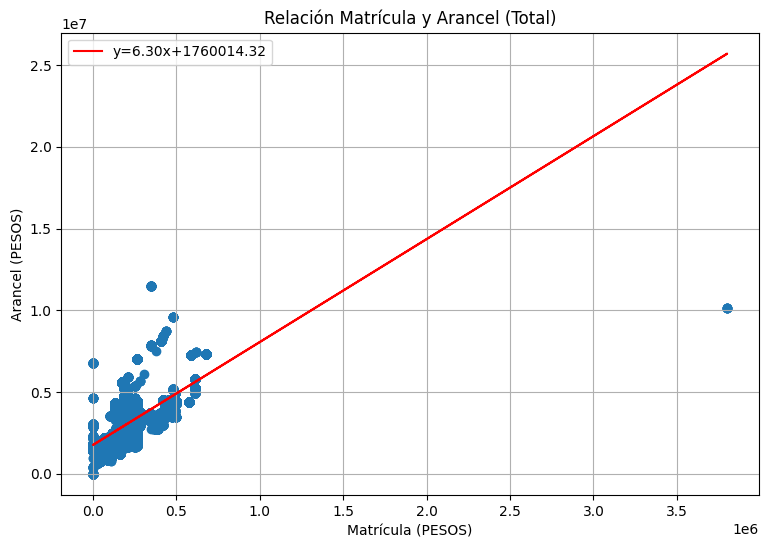

In [41]:
coef_correlacion = df['VALOR MATRICULA (PESOS)'].corr(df['VALOR ARANCEL (PESOS)']).round(2)
print("Correlacion total entre matricula y arancel:", coef_correlacion)

import matplotlib.pyplot as plt

v_indep = df['VALOR MATRICULA (PESOS)']
v_depen = df['VALOR ARANCEL (PESOS)']

m,n = np.polyfit(v_indep,v_depen,1)
pendiente, intercepto = m,n

fig,ax = plt.subplots(figsize = (9,6))
dispersion = ax.scatter(v_indep, v_depen)

ax.plot(v_indep, m * v_indep + n, color='red', label= f'y={pendiente:.2f}x+{intercepto:.2f}')

ax.set_title('Relación Matrícula y Arancel (Total)')
ax.set_xlabel('Matrícula (PESOS)')
ax.set_ylabel('Arancel (PESOS)')
ax.legend()
ax.grid(True)
plt.show()  

Correlaciones por tipo de institución:

Universidades Privadas : 0.6313259672073219
Institutos Profesionales : 0.7086666977004975
Universidades CRUCH : 0.4516593385736345
Centros de Formacion Tecnica : 0.5540103466476295


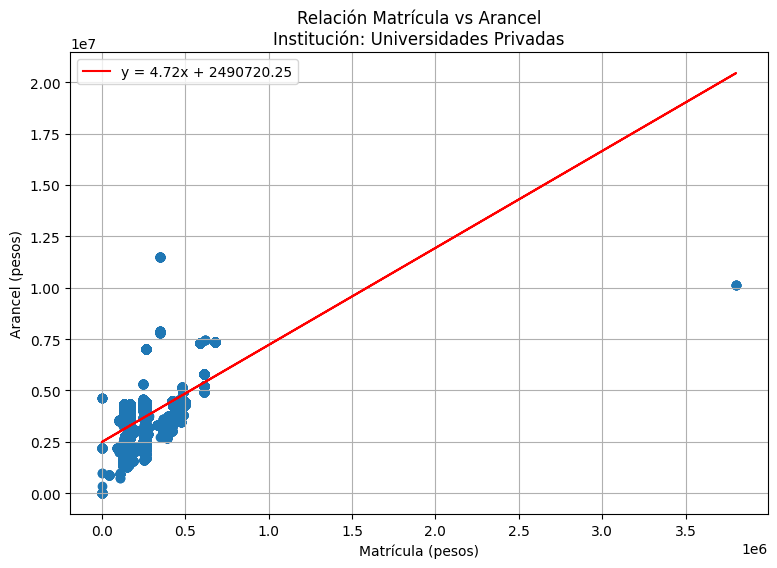

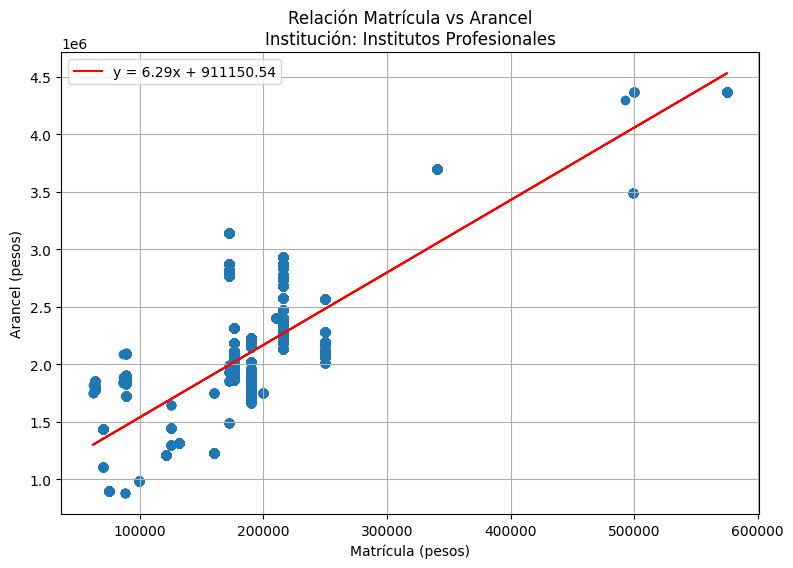

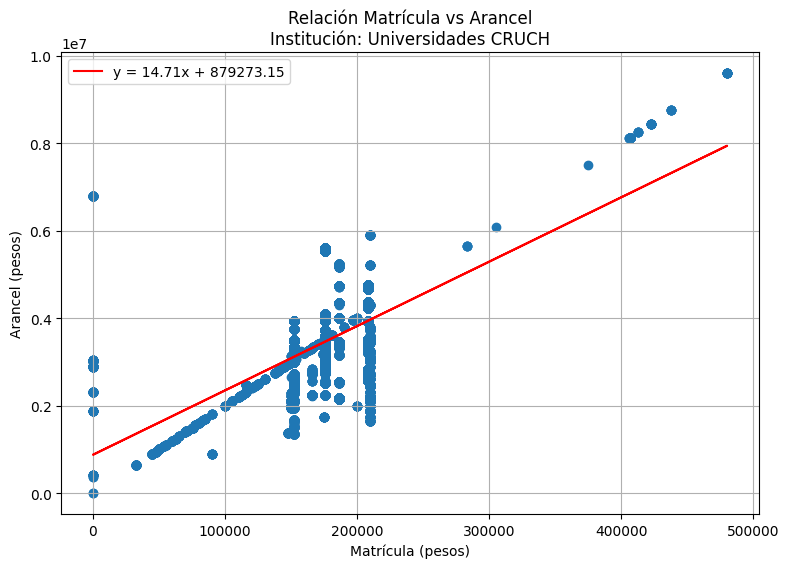

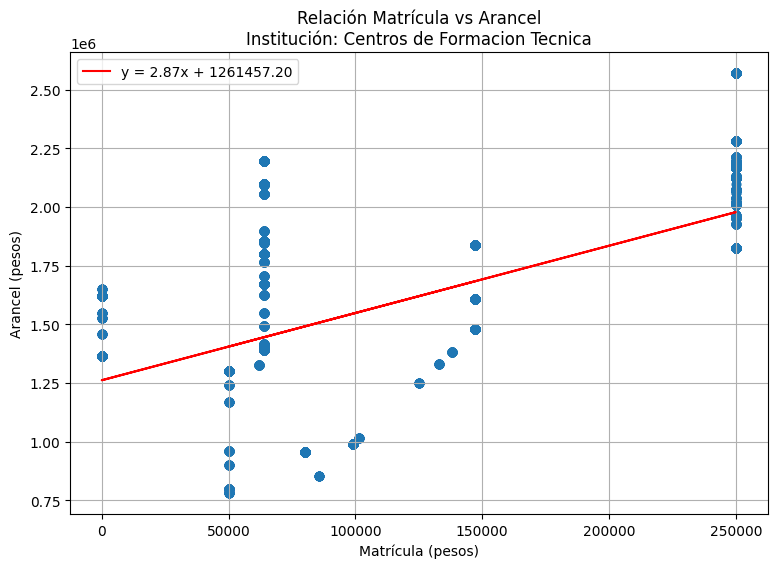

In [42]:
import matplotlib.pyplot as plt

tipos = df['TIPO DE INSTITUCION'].unique()

print("Correlaciones por tipo de institución:\n")

for t in tipos:
    df_temp = df[df['TIPO DE INSTITUCION'] == t]
    correlacion = df_temp['VALOR MATRICULA (PESOS)'].corr(df_temp['VALOR ARANCEL (PESOS)'])
    print(t, ":", correlacion)

for t in tipos:
    df_temp = df[df['TIPO DE INSTITUCION'] == t]

    v_indep = df_temp['VALOR MATRICULA (PESOS)']
    v_depen = df_temp['VALOR ARANCEL (PESOS)']

    pendiente = v_indep.cov(v_depen) / v_indep.var()
    intercepto = v_depen.mean() - pendiente * v_indep.mean()

    fig, ax = plt.subplots(figsize=(9,6))

    ax.scatter(v_indep, v_depen)
    ax.plot(v_indep,pendiente * v_indep + intercepto,color='red',label=f'y = {pendiente:.2f}x + {intercepto:.2f}')
    ax.set_title("Relación Matrícula vs Arancel\nInstitución: " + t)
    ax.set_xlabel("Matrícula (pesos)")
    ax.set_ylabel("Arancel (pesos)")
    ax.legend()
    ax.grid(True)

    plt.show()


Respuesta: Existe una correlación positiva entre el valor de la matricula y el arancel tanto de forma general como dentro de cada tipo de institucion.
Sin embargo, los grupos no se comportan exactamente igual, ya que presentan pendientes y niveles de dispersion distintos.
Por esto, si vale la pena analizar los tipos de institucion por separado, ya que el estudio grupal revela comportamientos diferenciados que no se aprecian si solo se analiza el total.

2.¿Cuál es la relación entre el arancel y la duración de la carrera correspondiente? ¿Es verdad que, mientras más larga la carrera, más cara? ¿Será igual en todas las áreas del conocimiento?

¿Cuál es la relación entre el arancel y la duración de la carrera correspondiente?

La relación encontrada es postivida es decir: 

A mayor duración de la carrera, mayor tiende a ser el arancel. Sin embargo, esta relación no es extremadamente fuerte, lo que indica que la duración influye, pero no es el único factor que determina el precio.

¿Es verdad que mientras más larga la carrera, más cara?

En promedio, sí: carreras de mayor duración tienden a tener aranceles más elevados.
Pero no siempre, pues existen carreras cortas con arancel alto y carreras largas con arancel moderado.

¿Será igual en todas las áreas del conocimiento?

No. Al separar por ÁREA DE CONOCIMIENTO, se observa que la relación cambia:

Salud: relación fuerte. Las carreras de salud son caras y largas.

Ingenierías y Tecnología: relación positiva moderada.

Ciencias Sociales y Humanidades: la relación suele ser más débil; la duración no determina tanto el precio.

Arte y Educación: aranceles relativamente parejos, aunque varíe la duración.

Técnico-Profesional: carreras cortas, pero con aranceles que dependen más de la institución que de la duración.

ITEM 2

PREGUNTA 1

¿Se produjo una gran vuelta a la presencialidad o los formatos que incluyen la no presencialidad han ganado terreno?

In [37]:
Tabla_frec_abs2 = pd.crosstab(df['MODALIDAD'], df['GENERO'],margins= True)
Tabla_frec_abs2

GENERO,Femenino,Masculino,All
MODALIDAD,,,
No Presencial,319,344,663
Presencial,56795,49995,106790
Semipresencial,1137,608,1745
All,58251,50947,109198


Si, se produjo una gran vuelta a la presencialidad, ya que la modalidad presencial cuanta con 106790 estudiantes entre hombres y mujeres en cambio la no presencialidad cuenta con muchos menos estudiantes que son 663 en total entre hombres y mujeres.

PREGUNTA 2

¿Qué tipo de institución emplea de mayor manera formatos no exclusivamente presenciales?

In [42]:
Tabla_frec_abs3 = pd.crosstab(df['TIPO DE INSTITUCION'], df['MODALIDAD'],margins= True)
Tabla_frec_abs3

MODALIDAD,No Presencial,Presencial,Semipresencial,All
TIPO DE INSTITUCION,,,,
Centros de Formacion Tecnica,95,10744,0,10839
Institutos Profesionales,158,27965,49,28172
Universidades CRUCH,120,43451,131,43702
Universidades Privadas,290,24630,1565,26485
All,663,106790,1745,109198


El tipo de institucion que emplea de mayor manera formatos no exclusivamente presenciales son las Universidades Privadas con 1.855 entre estudiantes de modalidades no presenciales o semipresenciales

PREGUNTA 3

¿Cuál es la probabilidad de seleccionar de los estudiantes hombres de la región a uno del área de educación? ¿Cuál es la probabilidad de seleccionar de las estudiantes mujeres de la región a una del área de educación? ¿Hay una discrepancia aparente? ¿Cómo se explica?

In [4]:
Tabla_frec_abs = pd.crosstab(df['AREA CONOCIMIENTO'], df['GENERO'],margins= True)
Tabla_frec_abs

GENERO,Femenino,Masculino,All
AREA CONOCIMIENTO,,,
Administracion y Comercio,9885,7479,17364
Agropecuaria,1973,1202,3175
Arte y Arquitectura,3583,2443,6026
Ciencias Basicas,1014,1333,2347
Ciencias Sociales,6936,3177,10113
Derecho,2539,1987,4526
Educacion,8477,3350,11827
Humanidades,595,340,935
Salud,16819,4996,21815


In [ ]:
Probabilidad_estudiante_hombre_area_educacion =  3350/50947
Probabilidad_estudiante_hombre_area_educacion*100

6.575460772960135

Probabilidad de que un estudiante hombre sea del área de Educación es de 6,58%

In [9]:
Probabilidad_estudiante_mujer_area_educacion = 8477/58251
Probabilidad_estudiante_mujer_area_educacion*100

14.552539870560164

Probabilidad de que una estudiante mujer sea del área de Educación es de 14,56%

¿Hay discrepancia? ¿Cómo se explica?

si, hay una discrepancia porque las mujeres tienen más del doble de probabilidad de estudiar educacion con un 14,56% que los hombres con un 6,58%.
La explicación para esto es que las carreras de Eduación suelen atraer a mas mujeres que hombres. también puede deberse a que la oferta laboral de la docencia resulta mas atractiva para las mujeres.